
---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as aesthetics
#import openweathermapy as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


613

In [3]:
# Testing API
#cities_test = ["paris", "london", "new york city"]

In [4]:
# Save config information.
url_test = "http://api.openweathermap.org/data/2.5/weather?"
units_test = "imperial"

# Build partial query URL
query_url_test = url_test + "appid=" + api_key + "&units=" + units_test+"&q=" 
print(query_url_test)

#settings = {"units": "imperial", "appid": api_key}


http://api.openweathermap.org/data/2.5/weather?appid=81f0684313acd62be0b97ebd0b4fdefb&units=imperial&q=


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units +"&q=" 
print(query_url)

#WEATHER DATA
print("Beginning Data Retrival")
print("------------------------------")

#set record count
record_count = 1

#set set count
set_count = 0

#error counter to count cities without data
error = 0

#index counter
index = 0

#Set parameters
weather_params = {
    "City": [],
    "Cloudiness": [],
    "Country": [],
    "Date": [],
    "Humidity": [],
    "Lat": [],
    "Lng": [],
    "Max Temp": [],
    "Wind Speed": [],
}

#loop through cities, make API request, and append desired results
for city in cities:
    response = requests.get(query_url+city).json()
    #print (response['sys']['country'])
    try:
        
        ##city_stats = owm.get_current(city, **settings)
        weather_params["Cloudiness"].append(response['clouds']['all'])
        weather_params["Country"].append(response['sys']['country'])
        weather_params["Date"].append(response['dt'])
        weather_params["Humidity"].append(response['main']['humidity'])
        weather_params["Lat"].append(response['coord']['lat'])
        weather_params["Lng"].append(response['coord']['lon'])
        weather_params["Max Temp"].append(response['main']['temp_max'])
        weather_params["Wind Speed"].append(response['wind']['speed'])
        weather_params["City"].append(city)
        print(f'Processing Record {record_count} of Set {set_count} | {city}' )
        index += 1
        #record_count += 1
    except:
        print('City not found. Skipping...')
        error +=  1
    record_count += 1
    if record_count == 50:
        record_count = 0 
        set_count = set_count+1
        time.sleep(2)


    
   
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")


http://api.openweathermap.org/data/2.5/weather?appid=81f0684313acd62be0b97ebd0b4fdefb&units=imperial&q=
Beginning Data Retrival
------------------------------
Processing Record 1 of Set 0 | ngunguru
Processing Record 2 of Set 0 | tasiilaq
Processing Record 3 of Set 0 | chenzhou
Processing Record 4 of Set 0 | busselton
City not found. Skipping...
Processing Record 6 of Set 0 | thompson
Processing Record 7 of Set 0 | albany
Processing Record 8 of Set 0 | panjakent
Processing Record 9 of Set 0 | bluff
Processing Record 10 of Set 0 | barrancas
Processing Record 11 of Set 0 | hobart
Processing Record 12 of Set 0 | kapaa
Processing Record 13 of Set 0 | toamasina
Processing Record 14 of Set 0 | kahului
Processing Record 15 of Set 0 | tuktoyaktuk
Processing Record 16 of Set 0 | bethel
City not found. Skipping...
Processing Record 18 of Set 0 | hambantota
Processing Record 19 of Set 0 | mackenzie
Processing Record 20 of Set 0 | faanui
Processing Record 21 of Set 0 | sao joao da barra
Processing

Processing Record 3 of Set 4 | lagoa
Processing Record 4 of Set 4 | suba
Processing Record 5 of Set 4 | ornes
Processing Record 6 of Set 4 | acapulco
Processing Record 7 of Set 4 | mandvi
Processing Record 8 of Set 4 | ulladulla
Processing Record 9 of Set 4 | le port
Processing Record 10 of Set 4 | leh
City not found. Skipping...
Processing Record 12 of Set 4 | alamos
Processing Record 13 of Set 4 | carnarvon
Processing Record 14 of Set 4 | victoria
Processing Record 15 of Set 4 | kloulklubed
Processing Record 16 of Set 4 | verkhnyaya inta
Processing Record 17 of Set 4 | bjelovar
Processing Record 18 of Set 4 | lesnoye
Processing Record 19 of Set 4 | bambous virieux
Processing Record 20 of Set 4 | port blair
Processing Record 21 of Set 4 | rio gallegos
City not found. Skipping...
Processing Record 23 of Set 4 | bom jesus
Processing Record 24 of Set 4 | cidreira
City not found. Skipping...
Processing Record 26 of Set 4 | inuvik
Processing Record 27 of Set 4 | tabou
Processing Record 28 

Processing Record 8 of Set 8 | lebu
Processing Record 9 of Set 8 | cayhagan
Processing Record 10 of Set 8 | pemba
Processing Record 11 of Set 8 | yankton
Processing Record 12 of Set 8 | muborak
Processing Record 13 of Set 8 | road town
Processing Record 14 of Set 8 | ipameri
Processing Record 15 of Set 8 | sibolga
Processing Record 16 of Set 8 | altoona
Processing Record 17 of Set 8 | lujan
Processing Record 18 of Set 8 | raudeberg
Processing Record 19 of Set 8 | richards bay
Processing Record 20 of Set 8 | ballina
Processing Record 21 of Set 8 | neuquen
Processing Record 22 of Set 8 | noumea
Processing Record 23 of Set 8 | itoman
Processing Record 24 of Set 8 | sorong
Processing Record 25 of Set 8 | puerto baquerizo moreno
Processing Record 26 of Set 8 | arawa
Processing Record 27 of Set 8 | sasykoli
Processing Record 28 of Set 8 | balkhash
Processing Record 29 of Set 8 | quibdo
Processing Record 30 of Set 8 | harnai
Processing Record 31 of Set 8 | klaksvik
Processing Record 32 of Set

Processing Record 11 of Set 12 | carutapera
Processing Record 12 of Set 12 | ayagoz
Processing Record 13 of Set 12 | vysokogornyy
-------------------------
Data Retrieval Complete
-------------------------


In [6]:
#cities[605]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
print(len(weather_params["City"]))

556


In [8]:
weather_params_df = pd.DataFrame(weather_params)
weather_params_df.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Lng           556
Max Temp      556
Wind Speed    556
dtype: int64

In [9]:
weather_params_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ngunguru,1,NZ,1561062355,96,-35.62,174.50,55.99,7.20
1,tasiilaq,4,GL,1561062355,93,65.61,-37.64,35.60,10.29
2,chenzhou,100,CN,1561062355,88,25.81,113.03,77.71,3.85
3,busselton,100,AU,1561062355,35,-33.64,115.35,57.00,17.27
4,thompson,20,CA,1561062356,24,55.74,-97.86,78.80,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

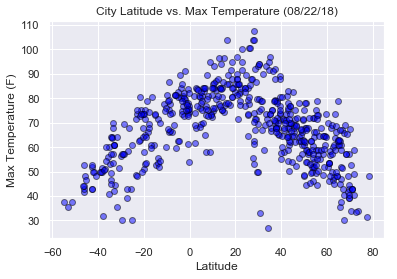

In [10]:
aesthetics.set()
plt.scatter(weather_params_df["Lat"], weather_params_df["Max Temp"], color='blue', alpha=0.5, edgecolor = "black")
#plt.ylim(0, 120)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature (08/22/18)")
#plt.grid(True)
plt.savefig("LatitudeVsTemperature.png")
plt.show()

#### Latitude vs. Humidity Plot

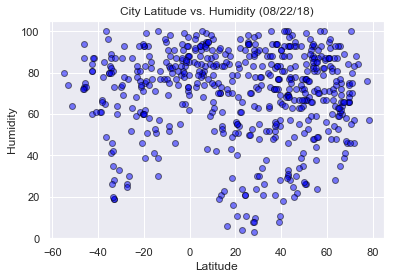

In [11]:
aesthetics.set()
plt.scatter(weather_params_df["Lat"], weather_params_df["Humidity"], color='blue', alpha=0.5, edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.ylim(0, 105)
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.savefig("LatitudeVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

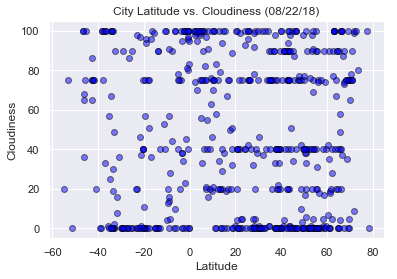

In [12]:
aesthetics.set()
plt.scatter(weather_params_df["Lat"], weather_params_df["Cloudiness"], color='blue', alpha=0.5, edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.savefig("LatitudeVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

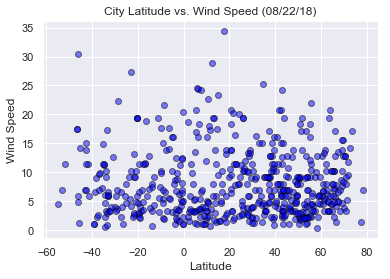

In [13]:
aesthetics.set()
plt.scatter(weather_params_df["Lat"], weather_params_df["Wind Speed"], color='blue', alpha=0.5, edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.savefig("LatitudeVsWindSpeed.png")
plt.show()